In [1]:
# Install necessary packages
import subprocess
import sys

In [2]:
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

In [3]:
packages = ["pandas", "numpy", "matplotlib", "seaborn", "scikit-learn", "scipy"]
for package in packages:
    install(package)

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [8]:
# Load the survey data
survey_df = pd.read_csv("C:\\A4\\Survey.csv")
sur_int = survey_df.iloc[:, 19:46]

In [9]:
# Standardize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [10]:
# Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(sur_int_scaled)
    sse.append(kmeans.inertia_)

C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

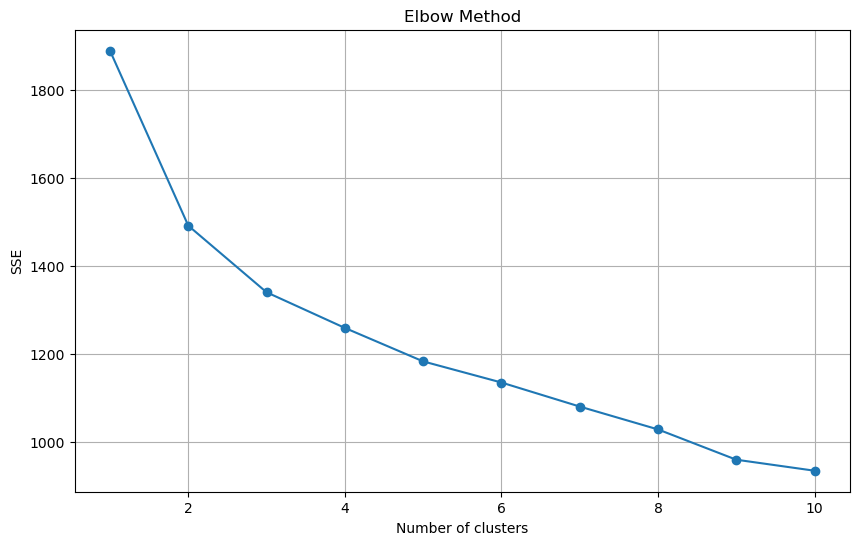

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [12]:
# Silhouette Method to determine the optimal number of clusters
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(sur_int_scaled)
    score = silhouette_score(sur_int_scaled, kmeans.labels_)
    silhouette_scores.append(score)

C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setti

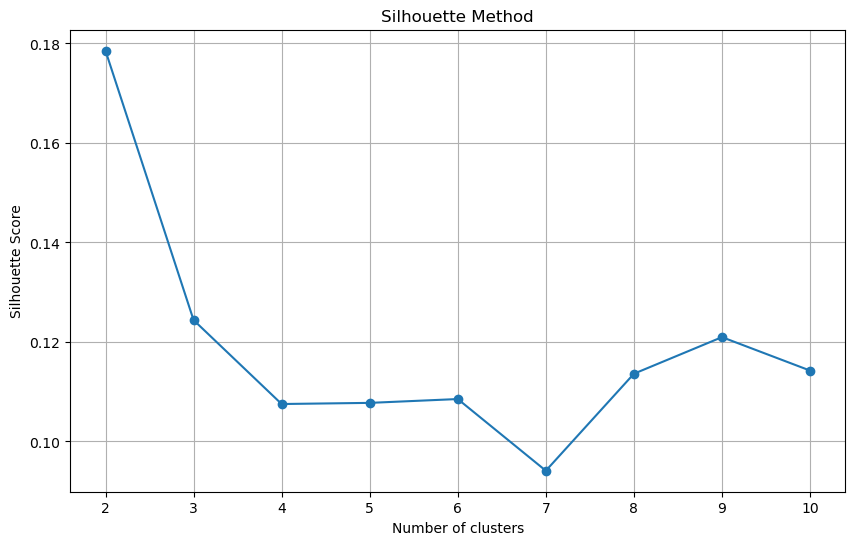

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [14]:
# Based on the elbow and silhouette methods, let's assume the optimal number of clusters is 4
n_clusters = 4

In [15]:
# K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=25)
kmeans.fit(sur_int_scaled)
labels = kmeans.labels_

C:\Users\Prakash R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


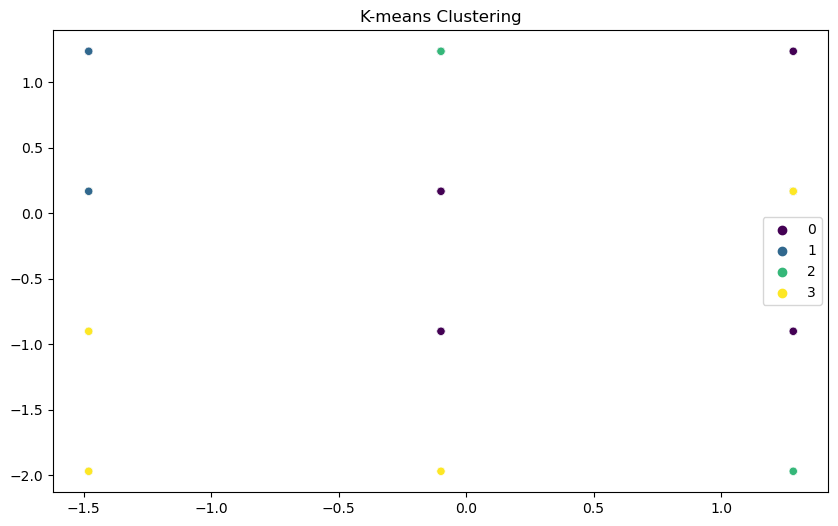

In [16]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=sur_int_scaled[:, 0], y=sur_int_scaled[:, 1], hue=labels, palette='viridis')
plt.title('K-means Clustering')
plt.show()

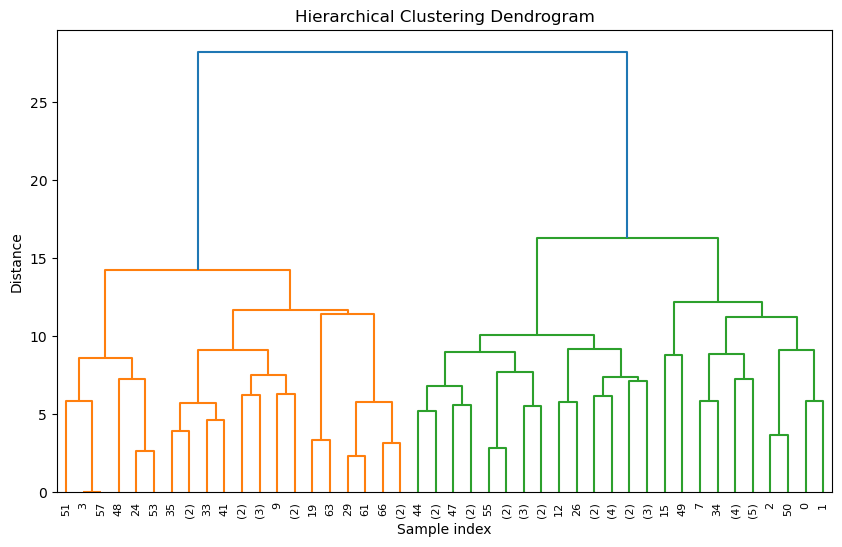

In [17]:
# Hierarchical clustering
Z = linkage(sur_int_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='level', p=5, color_threshold=0.7*np.max(Z[:, 2]), show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [18]:
# Cut the dendrogram to form clusters
cluster_labels = fcluster(Z, n_clusters, criterion='maxclust')

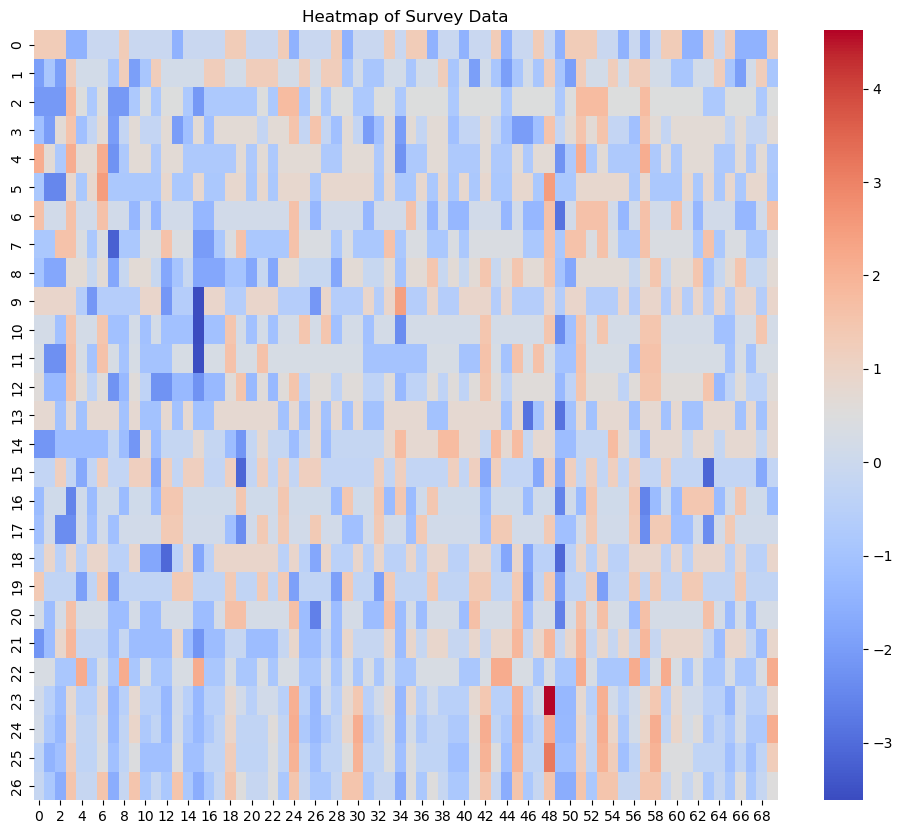

In [19]:
# Create a heatmap to visualize the clusters
plt.figure(figsize=(12, 10))
sns.heatmap(pd.DataFrame(sur_int_scaled).T, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Survey Data')
plt.show()

In [20]:
# Characterizing the respondents based on their background variables
background_vars = survey_df.iloc[:, :19]  # Assuming first 19 columns are background variables
background_vars['Cluster'] = labels

In [21]:
# Separate numeric and non-numeric columns
numeric_cols = background_vars.select_dtypes(include=np.number).columns
non_numeric_cols = background_vars.select_dtypes(exclude=np.number).columns

In [22]:
# Calculate mean for numeric columns and mode for non-numeric columns
numeric_summary = background_vars.groupby('Cluster')[numeric_cols].mean()
non_numeric_summary = background_vars.groupby('Cluster')[non_numeric_cols].agg(lambda x: x.mode().iloc[0])